# 0. Install and import the libraries

In [1]:
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install matplotlib


  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached werkzeug-3.0.4-py3-none-any.whl.metadata (3.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 MB 4.9 MB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 7.5 MB/s eta 0:00:00MB/s eta 0:00:01:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 7.6 MB/s eta 0:00:007.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 7.3 MB/s eta 0:00:007.3 MB/s eta 0:00:01
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.9 MB/s eta 0:00:006.3 MB/s eta 0:00:01
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
Using cached werkzeug-3.0.4-py3-none-any.whl (227 kB)
  Attempting uninstall: numpy

In [27]:

import toolz as tz
import functools as ft
import operator as op
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

# 1. Set Random Seed for Reproducibility

In [3]:
np.random.seed(42)
tf.random.set_seed(42)
batch_size = 64

# 2. Load and Preprocess the MNIST Dataset

In [4]:
# Load the MNIST dataset
(x_train, y_train_orig), (x_test, y_test_orig) = keras.datasets.mnist.load_data()

# Normalize the images to [0, 1] range and flatten them
x_train = x_train.astype('float32') / 255.0
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test = x_test.astype('float32') / 255.0
x_test_flat = x_test.reshape(-1, 28 * 28)

# Convert labels to one-hot encoded vectors
num_classes = 10
y_train = keras.utils.to_categorical(y_train_orig, num_classes)

y_test = keras.utils.to_categorical(y_test_orig, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# 3. Hyperparameters

In [19]:
''' TODO: Adjust the following parameters with different values. Save the plots and test results for each setup.
    TODO: write a report about your findings from varying the parameters and their effect on overall performance. '''

# lr: 0.1, 0.01, ...
# epoch: 5, 10, 50, ...
# layer: [128], [256, 256], ... .
learning_rate = 0.01
num_epochs = 5
hidden_layers = (128,)

# 4. Define the Neural Network Model

In [20]:
def create_mlp_model(input_size, hidden_layers, output_size):
    model = keras.Sequential()

    # Input layer is defined by specifying input_shape in the first layer
    for i, units in enumerate(hidden_layers):
        if i == 0:
            # First hidden layer with input shape specified
            model.add(layers.Dense(units, activation='relu', input_shape=(input_size,)))
        else:
            # Subsequent hidden layers
            model.add(layers.Dense(units, activation='relu'))

    # Output layer with softmax activation for multi-class classification
    model.add(layers.Dense(output_size, activation='softmax'))

    return model

# Model parameters
input_size = 28 * 28  # MNIST images are 28x28 pixels
output_size = num_classes  # 10 classes for digits 0-9

# Create the model
model = create_mlp_model(input_size, hidden_layers, output_size)

This is the unit  128


# 5. Compile the Model

In [21]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Train the Model

In [22]:
history = model.fit(
    x_train_flat, y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_split=0.1,  # Use 10% of training data for validation
    verbose=1
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6285 - loss: 1.3683 - val_accuracy: 0.8975 - val_loss: 0.4325
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8731 - loss: 0.4723 - val_accuracy: 0.9138 - val_loss: 0.3265
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8925 - loss: 0.3851 - val_accuracy: 0.9208 - val_loss: 0.2879
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9020 - loss: 0.3456 - val_accuracy: 0.9268 - val_loss: 0.2653
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9086 - loss: 0.3200 - val_accuracy: 0.9307 - val_loss: 0.2488


# 7. Evaluate the Model on Test Data

In [23]:
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 91.98%


# 8. Visualize Training History

TypeError: Figure.savefig() missing 1 required positional argument: 'fname'

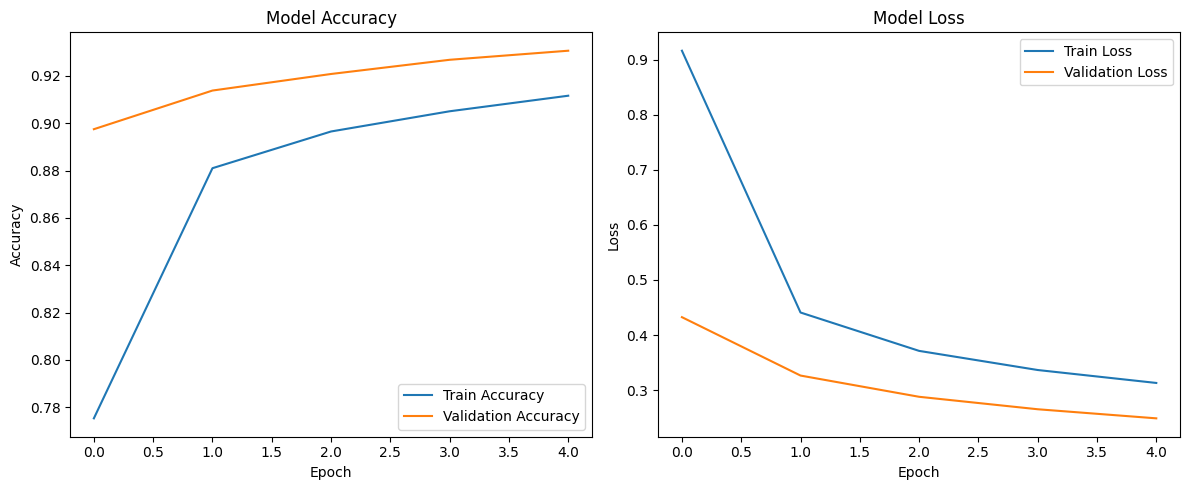

In [24]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig()

# 9. Test the Model on Random Input Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


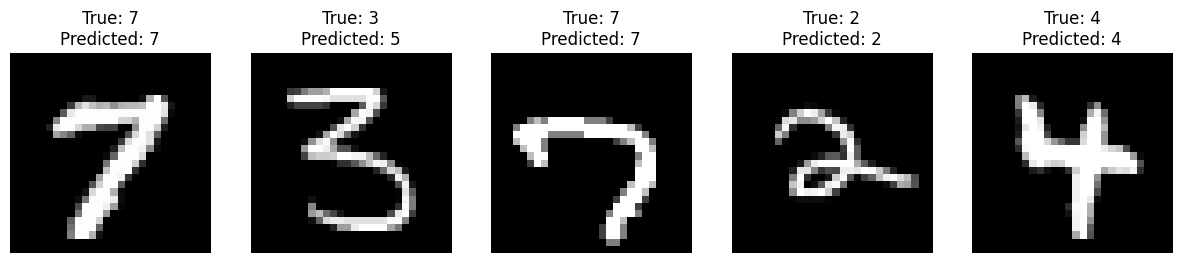

(array([7, 5, 7, 2, 4]),
 array([[1.00960324e-06, 1.55742225e-06, 1.24617654e-04, 1.10515844e-04,
         1.93396681e-06, 1.38183213e-05, 8.42664605e-08, 9.97420669e-01,
         3.63279250e-04, 1.96253438e-03],
        [9.71299876e-03, 2.92169803e-04, 9.70418472e-03, 2.15988621e-01,
         1.88642950e-03, 6.84287012e-01, 2.75216968e-04, 3.30918469e-04,
         7.27205724e-02, 4.80188569e-03],
        [1.45993344e-02, 1.46707729e-03, 5.63952723e-04, 4.34385799e-03,
         3.77248530e-03, 9.61470976e-03, 4.27495310e-04, 8.94432843e-01,
         1.10640684e-02, 5.97142875e-02],
        [4.14318405e-04, 4.79314961e-02, 5.58979034e-01, 2.59956322e-03,
         1.27739146e-01, 8.78854189e-03, 6.86316490e-02, 1.01387709e-01,
         5.63785471e-02, 2.71499865e-02],
        [3.73089826e-08, 4.29923858e-07, 9.37273441e-08, 1.64230314e-05,
         9.98430312e-01, 2.24928808e-05, 3.17202866e-05, 3.02755769e-04,
         1.60988238e-05, 1.17963052e-03]], dtype=float32))

In [25]:
# Select random samples from the test set
num_samples = 5
random_indices = np.random.choice(x_test.shape[0], num_samples, replace=False)
random_images = x_test[random_indices]
random_images_flat = x_test_flat[random_indices]
random_labels = y_test_orig[random_indices]

# Predict the labels of the random images
predictions = model.predict(random_images_flat)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the random images along with predicted and true labels
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f"True: {random_labels[i]}\nPredicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()
predicted_labels, predictions

In [44]:

def gen_accuracy_and_loss_graph(model, plot_title): 
    """
    @param plot_title: the title to save the generated graphs under
    @param model: a model trained on the MINST digits dataset
    @return: generates graphs of the model's loss and accuracy over multiple 
    epochs
    """
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(model.history['accuracy'], label='Train Accuracy')
    plt.plot(model.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(model.history['loss'], label='Train Loss')
    plt.plot(model.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.savefig(plot_title)
    

def accuracy_and_loss_graphs_of_model(training_data, model_config):
    """
    @param model_config: a tuple containing the learning rate, number of 
    epochs, number of hidden layers for the model, and other configuration 
    information for the model
    @param training_data: a tuple of the samples and expected labels for each sample 
    to be used for training the model
    @return: creates a model using the given configuration and training 
    data and generates two graphs of the model's accuracy and loss
    over multiple epochs
    """
    samples, labels = training_data
    model = create_mlp_model(model_config["input_size"],
                             model_config["hidden_layers"],
                              model_config["output_size"])
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=model_config['learning_rate']),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    fitted_model = model.fit(samples,
                             labels,
                             epochs=model_config["epochs"],
                             batch_size=model_config["batch_size"],
                             validation_split=0.1)
    
    gen_accuracy_and_loss_graph(fitted_model, f"lr_{model_config['learning_rate']}|epoch_{model_config['epochs']}|layer_{model_config["hidden_layers"]}.jpeg")



In [36]:
def modify_config(config, key, val):
    return tz.assoc(config, key, val)


@tz.curry
def gen_model_configs(default_configuration, key, values):
    """
    @param default_configuration: the default set of values to use
    for a model
    @param key: one of the values used to configure the model
    @param values: the new values to use for key
    @return: generates a new model configuration for each
     value in values, overwriting the old value for key with the
     new value
    """
    new_config = ft.partial(modify_config, default_configuration, key)
    return list(map(new_config, values))


def gen_model_configs_for_many_parameters(default_configuration, params_and_new_values):
    """
    @param default_configuration:  the default set of values to use
    for a model
    @param params_and_new_values: a collection of pairs, where each pair contains
    a model setting and the new values to use for those settings
    @return: a collection of model configurations using the new values for the
    params given in params_and_new_values
    """
    gen_config = gen_model_configs(default_configuration)

    return tz.thread_last(params_and_new_values,
                          (map, lambda coll: gen_config(*coll)),
                          (ft.reduce, op.add))



In [37]:
default_model_conf = {"input_size": 28**2,
                      "hidden_layers": (128, ),
                      "output_size": 10,
                      'learning_rate': 0.01,
                      "epochs": 5,
                      "batch_size": 64}

all_model_settings = [("learning_rate", [0.1, 0.01]),
                     ("epochs", [5, 10, 50]),
                     ("hidden_layers", [(128,), (128, 128), (256, ), (256, 256)])]
all_potential_model_configs = gen_model_configs_for_many_parameters(default_model_conf,
                                                                    all_model_settings)
all_potential_model_configs

[{'input_size': 784,
  'hidden_layers': (128,),
  'output_size': 10,
  'learning_rate': 0.1,
  'epochs': 5,
  'batch_size': 64},
 {'input_size': 784,
  'hidden_layers': (128,),
  'output_size': 10,
  'learning_rate': 0.01,
  'epochs': 5,
  'batch_size': 64},
 {'input_size': 784,
  'hidden_layers': (128,),
  'output_size': 10,
  'learning_rate': 0.01,
  'epochs': 5,
  'batch_size': 64},
 {'input_size': 784,
  'hidden_layers': (128,),
  'output_size': 10,
  'learning_rate': 0.01,
  'epochs': 10,
  'batch_size': 64},
 {'input_size': 784,
  'hidden_layers': (128,),
  'output_size': 10,
  'learning_rate': 0.01,
  'epochs': 50,
  'batch_size': 64},
 {'input_size': 784,
  'hidden_layers': (128,),
  'output_size': 10,
  'learning_rate': 0.01,
  'epochs': 5,
  'batch_size': 64},
 {'input_size': 784,
  'hidden_layers': (128, 128),
  'output_size': 10,
  'learning_rate': 0.01,
  'epochs': 5,
  'batch_size': 64},
 {'input_size': 784,
  'hidden_layers': (256,),
  'output_size': 10,
  'learning_rate

This is the unit  128
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8324 - loss: 0.6179 - val_accuracy: 0.9448 - val_loss: 0.1948
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9347 - loss: 0.2214 - val_accuracy: 0.9632 - val_loss: 0.1426
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9517 - loss: 0.1625 - val_accuracy: 0.9678 - val_loss: 0.1185
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9620 - loss: 0.1304 - val_accuracy: 0.9700 - val_loss: 0.1049
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9688 - loss: 0.1096 - val_accuracy: 0.9718 - val_loss: 0.0956
This is the unit  128
Epoch 1/5


/Users/eitanbarylko/Workbench/cmpt-310/assignment-2/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6285 - loss: 1.4126 - val_accuracy: 0.8977 - val_loss: 0.4408
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8720 - loss: 0.4812 - val_accuracy: 0.9168 - val_loss: 0.3249
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8944 - loss: 0.3856 - val_accuracy: 0.9242 - val_loss: 0.2835
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9026 - loss: 0.3437 - val_accuracy: 0.9313 - val_loss: 0.2597
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9099 - loss: 0.3172 - val_accuracy: 0.9360 - val_loss: 0.2429
This is the unit  128
Epoch 1/5


/Users/eitanbarylko/Workbench/cmpt-310/assignment-2/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6174 - loss: 1.4242 - val_accuracy: 0.9028 - val_loss: 0.4316
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8770 - loss: 0.4766 - val_accuracy: 0.9163 - val_loss: 0.3203
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8952 - loss: 0.3838 - val_accuracy: 0.9252 - val_loss: 0.2807
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9049 - loss: 0.3425 - val_accuracy: 0.9303 - val_loss: 0.2580
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9113 - loss: 0.3162 - val_accuracy: 0.9337 - val_loss: 0.2419
This is the unit  128
Epoch 1/10


/Users/eitanbarylko/Workbench/cmpt-310/assignment-2/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6329 - loss: 1.3806 - val_accuracy: 0.9003 - val_loss: 0.4353
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8766 - loss: 0.4741 - val_accuracy: 0.9167 - val_loss: 0.3219
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8955 - loss: 0.3807 - val_accuracy: 0.9237 - val_loss: 0.2815
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9053 - loss: 0.3394 - val_accuracy: 0.9282 - val_loss: 0.2585
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9122 - loss: 0.3130 - val_accuracy: 0.9327 - val_loss: 0.2421
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9171 - loss: 0.2932 - val_accuracy: 0.9363 - val_loss: 0.2289
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9216 - loss: 0.2771 - val_accuracy: 0.9390 - val_loss: 0.2180
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9258 - loss: 0.2634 - val_accuracy: 0.9425 - va

/Users/eitanbarylko/Workbench/cmpt-310/assignment-2/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6210 - loss: 1.3963 - val_accuracy: 0.8977 - val_loss: 0.4272
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8770 - loss: 0.4699 - val_accuracy: 0.9170 - val_loss: 0.3198
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8952 - loss: 0.3816 - val_accuracy: 0.9238 - val_loss: 0.2817
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9036 - loss: 0.3424 - val_accuracy: 0.9278 - val_loss: 0.2598
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9095 - loss: 0.3172 - val_accuracy: 0.9337 - val_loss: 0.2442
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9145 - loss: 0.2982 - val_accuracy: 0.9360 - val_loss: 0.2317
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9193 - loss: 0.2827 - val_accuracy: 0.9373 - val_loss: 0.2211
Epoch 8/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9231 - loss: 0.2694 - val_accuracy

/Users/eitanbarylko/Workbench/cmpt-310/assignment-2/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6304 - loss: 1.3849 - val_accuracy: 0.8997 - val_loss: 0.4295
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8774 - loss: 0.4701 - val_accuracy: 0.9168 - val_loss: 0.3200
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8945 - loss: 0.3793 - val_accuracy: 0.9253 - val_loss: 0.2801
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9048 - loss: 0.3380 - val_accuracy: 0.9282 - val_loss: 0.2568
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9123 - loss: 0.3112 - val_accuracy: 0.9347 - val_loss: 0.2402
This is the unit  128
This is the unit  128
Epoch 1/5


/Users/eitanbarylko/Workbench/cmpt-310/assignment-2/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5887 - loss: 1.5124 - val_accuracy: 0.9062 - val_loss: 0.3755
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8855 - loss: 0.4158 - val_accuracy: 0.9248 - val_loss: 0.2790
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9042 - loss: 0.3327 - val_accuracy: 0.9340 - val_loss: 0.2442
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9141 - loss: 0.2942 - val_accuracy: 0.9375 - val_loss: 0.2220
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9221 - loss: 0.2677 - val_accuracy: 0.9422 - val_loss: 0.2051
This is the unit  256
Epoch 1/5


/Users/eitanbarylko/Workbench/cmpt-310/assignment-2/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6677 - loss: 1.3285 - val_accuracy: 0.9002 - val_loss: 0.4192
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8796 - loss: 0.4601 - val_accuracy: 0.9170 - val_loss: 0.3173
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8974 - loss: 0.3743 - val_accuracy: 0.9245 - val_loss: 0.2790
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9061 - loss: 0.3347 - val_accuracy: 0.9273 - val_loss: 0.2560
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9129 - loss: 0.3089 - val_accuracy: 0.9327 - val_loss: 0.2395
This is the unit  256
This is the unit  256
Epoch 1/5


/Users/eitanbarylko/Workbench/cmpt-310/assignment-2/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.6284 - loss: 1.4122 - val_accuracy: 0.9093 - val_loss: 0.3569
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.8879 - loss: 0.3992 - val_accuracy: 0.9247 - val_loss: 0.2709
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9069 - loss: 0.3218 - val_accuracy: 0.9343 - val_loss: 0.2367
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9178 - loss: 0.2834 - val_accuracy: 0.9423 - val_loss: 0.2142
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9254 - loss: 0.2566 - val_accuracy: 0.9465 - val_loss: 0.1970


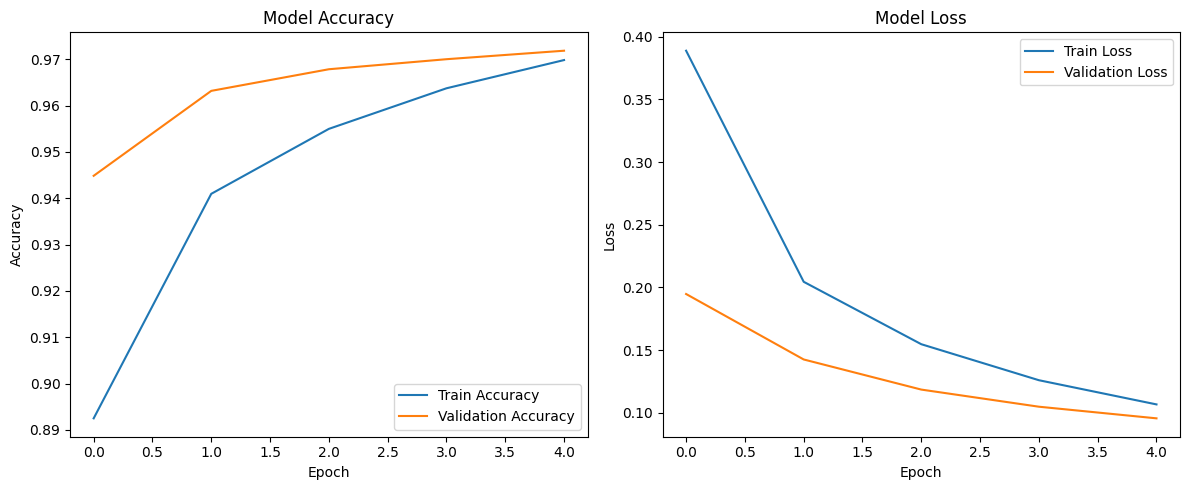

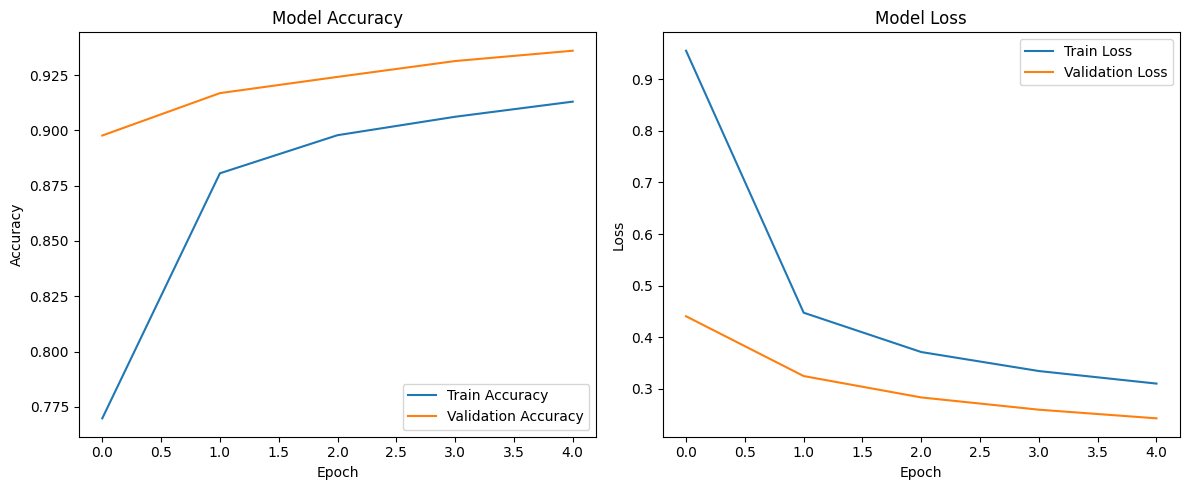

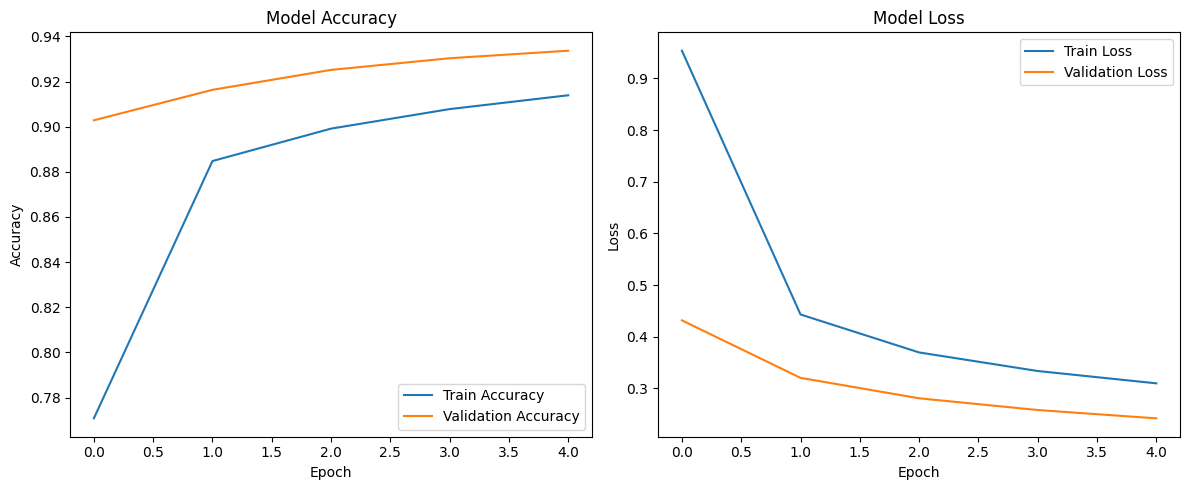

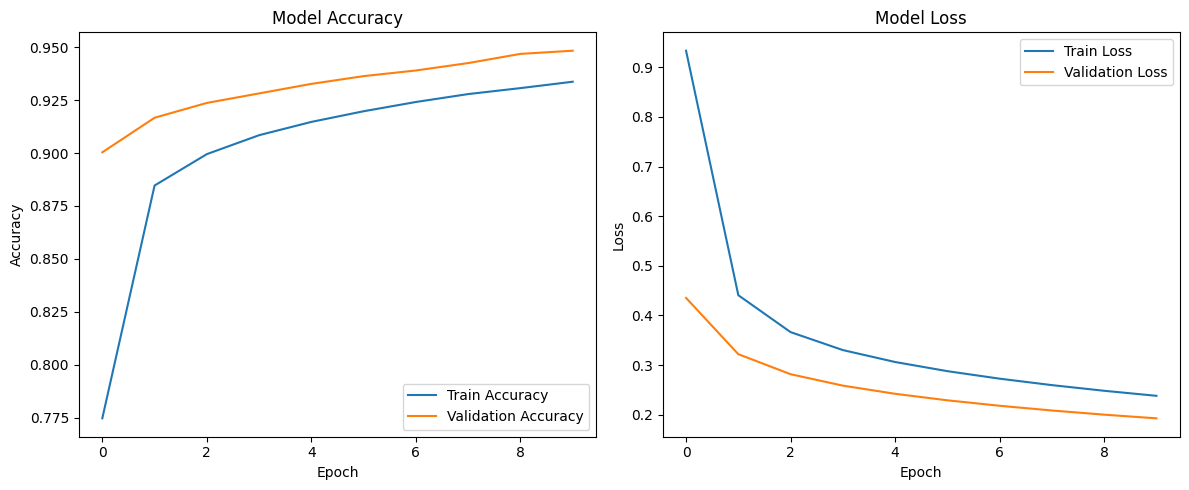

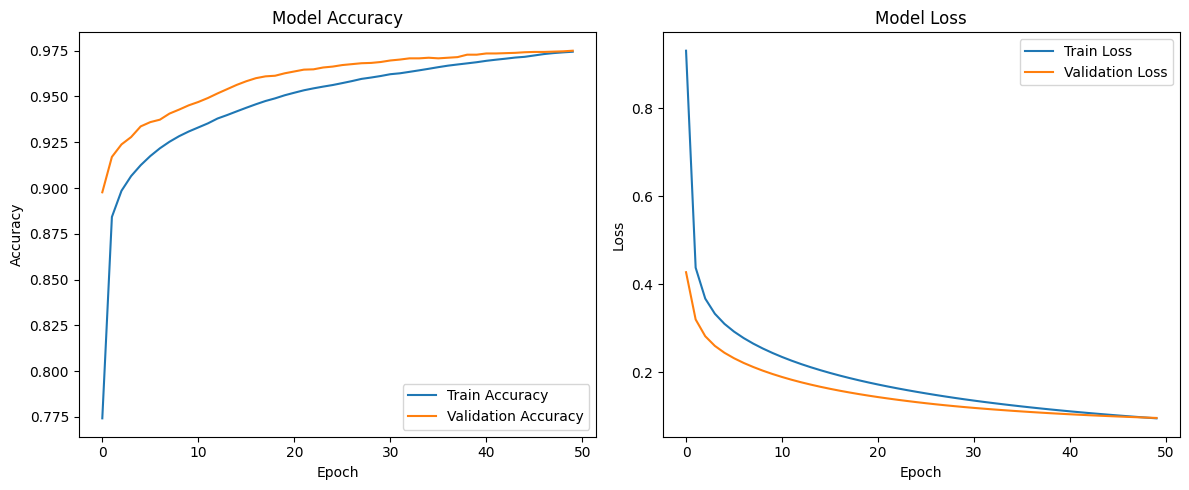

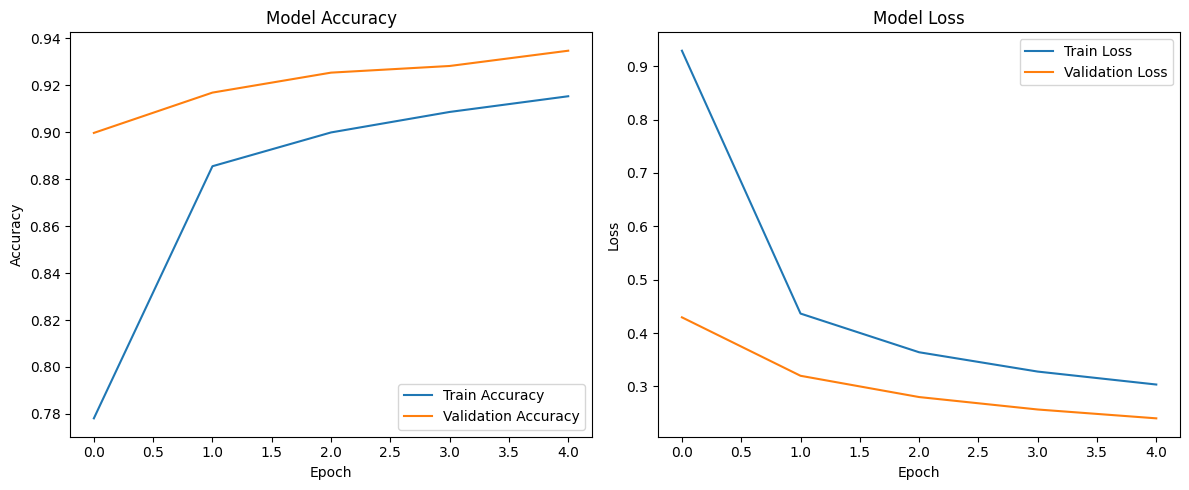

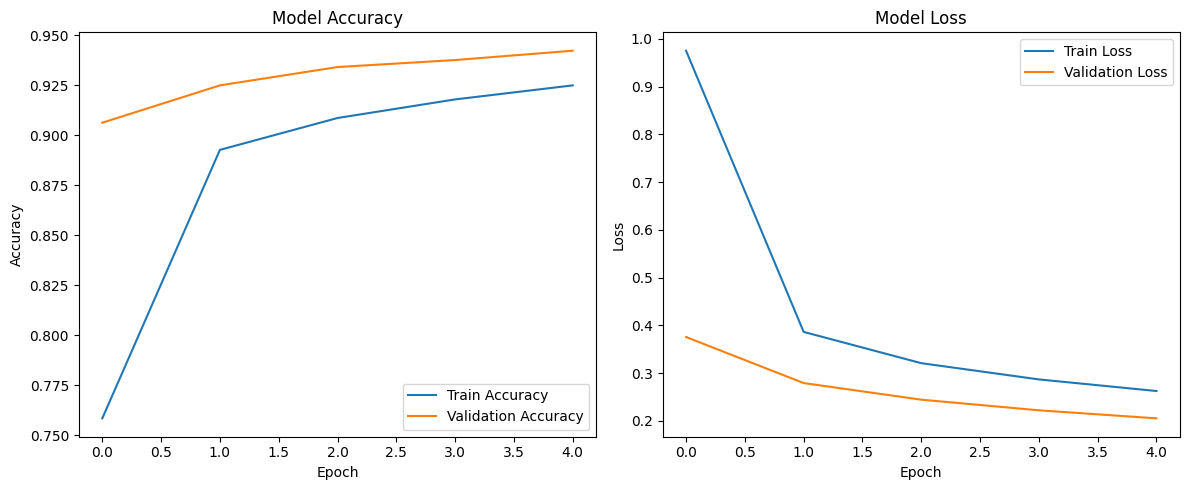

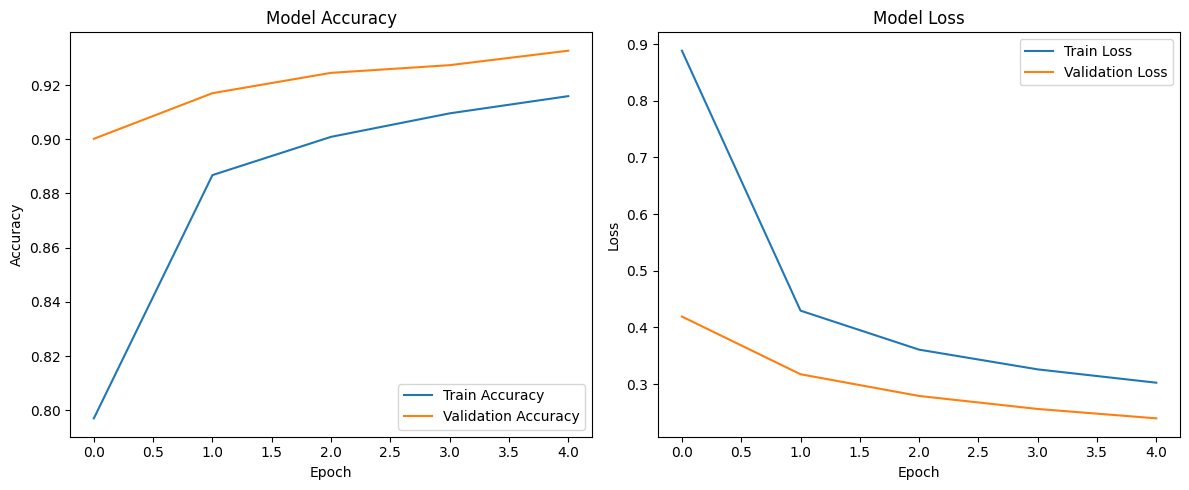

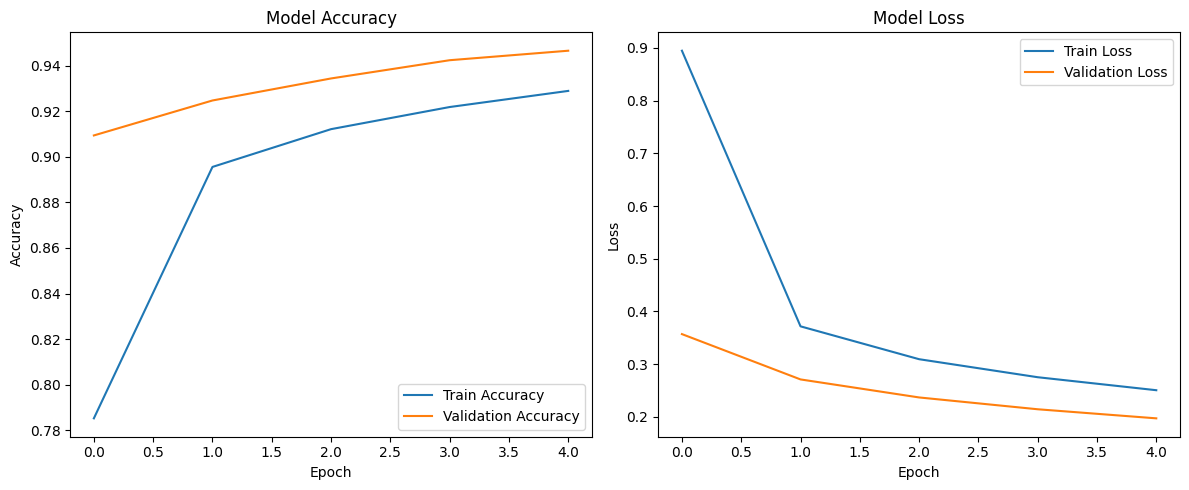

In [45]:
for config in all_potential_model_configs:
    accuracy_and_loss_graphs_of_model((x_train_flat, y_train), config)